In [ ]:
import pandas as pd
df=pd.read_csv('/content/train (1).csv')
df.head()

category                       sub_category  \
0  Online and Social Media Related Crime  Cyber Bullying  Stalking  Sexting   
1                 Online Financial Fraud                  Fraud CallVishing   
2               Online Gambling  Betting           Online Gambling  Betting   
3  Online and Social Media Related Crime                   Online Job Fraud   
4                 Online Financial Fraud                  Fraud CallVishing   

                                  crimeaditionalinfo  
0  I had continue received random calls and abusi...  
1  The above fraudster is continuously messaging ...  
2  He is acting like a police and demanding for m...  
3  In apna Job I have applied for job interview f...  
4  I received a call from lady stating that she w...

In [ ]:
import pandas as pd
df_test=pd.read_csv('/content/test (1).csv')
df_test.head()

category  \
0  RapeGang Rape RGRSexually Abusive Content   
1                     Online Financial Fraud   
2             Cyber Attack/ Dependent Crimes   
3                     Online Financial Fraud   
4                      Any Other Cyber Crime   

                           sub_category  \
0                                   NaN   
1  DebitCredit Card FraudSim Swap Fraud   
2                         SQL Injection   
3                     Fraud CallVishing   
4                                 Other   

                                  crimeaditionalinfo  
0  Sir namaskar  mein Ranjit Kumar PatraPaise neh...  
1          KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT  
2  The issue actually started when I got this ema...  
3  I am amit kumar from karwi chitrakoot I am tot...  
4  I have ordered  saree and  blouse from rinki s...

In [ ]:
df_test.shape

(31229, 3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


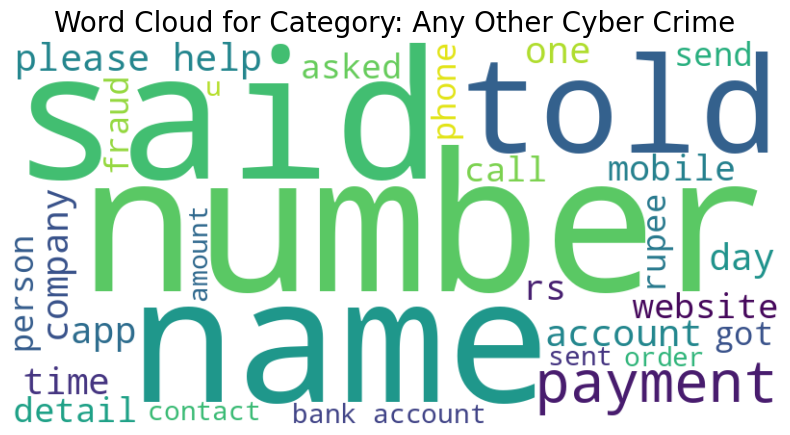

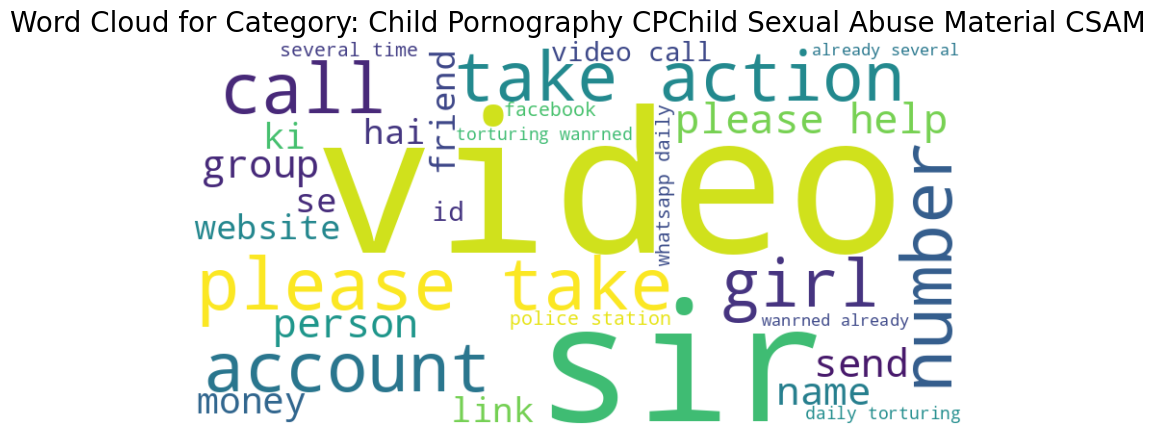

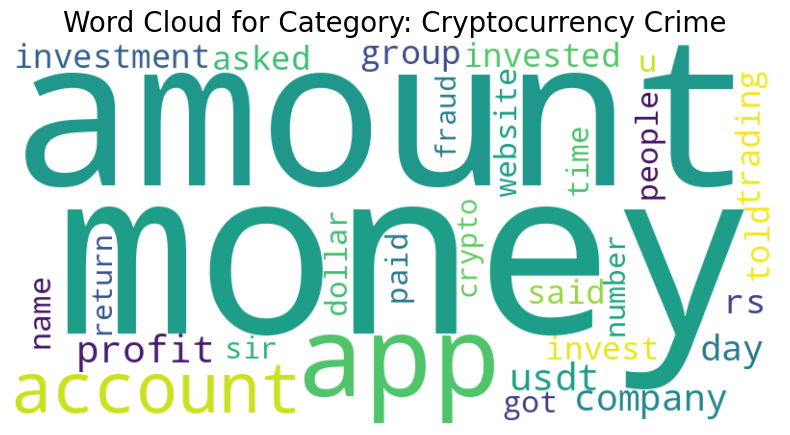

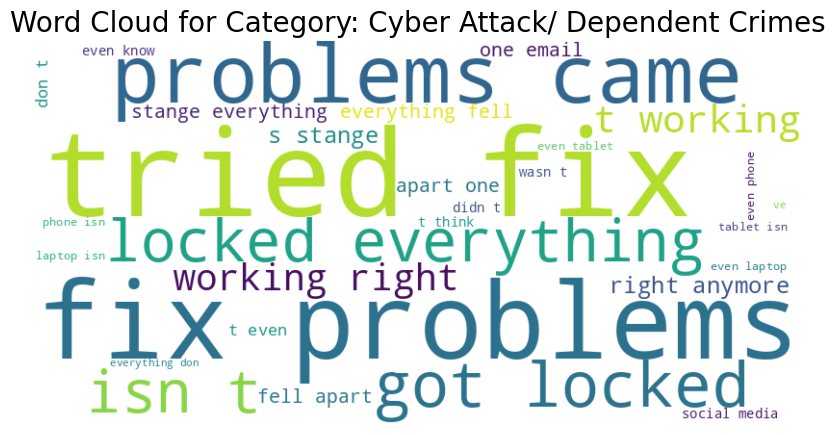

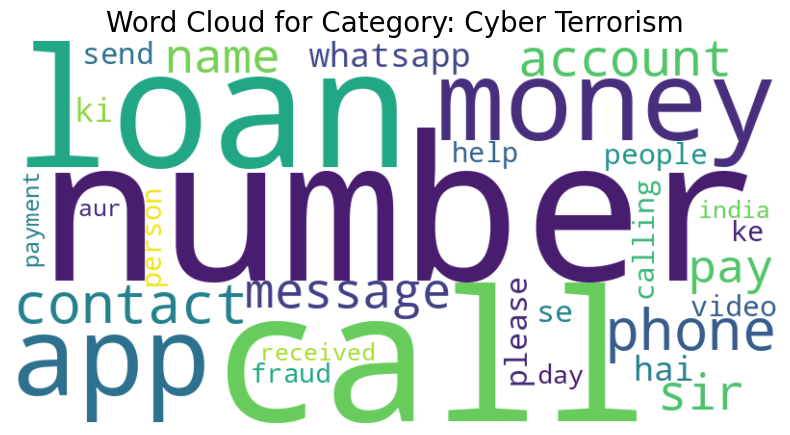

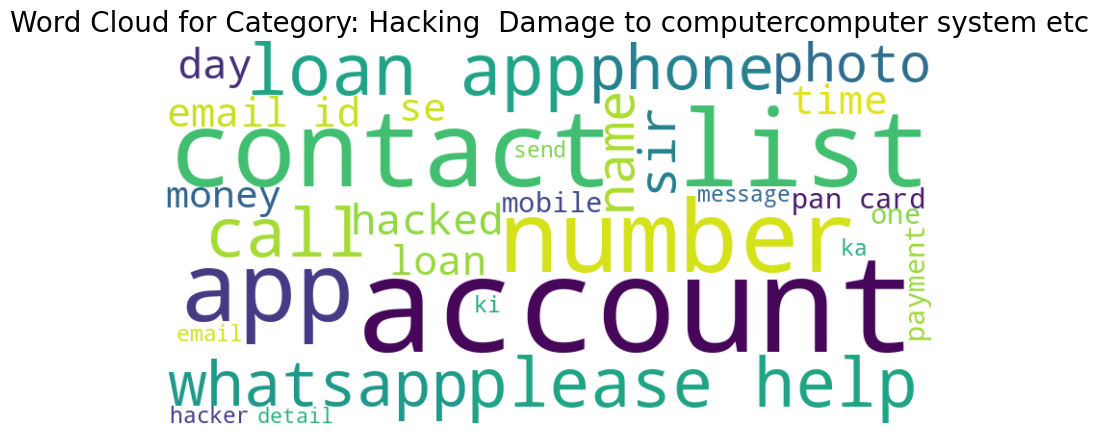

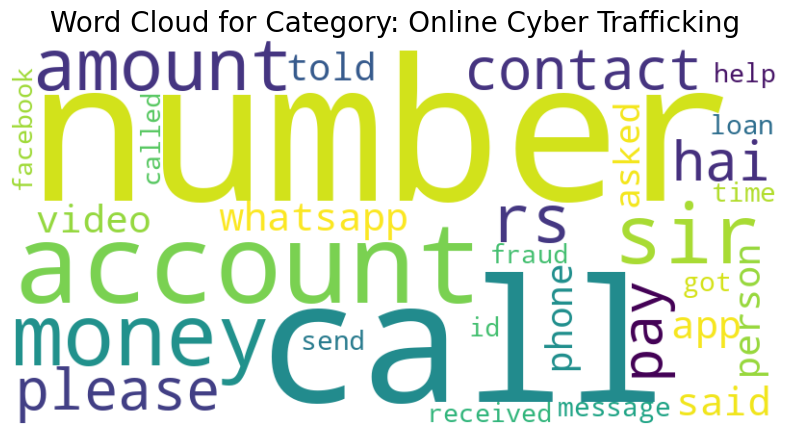

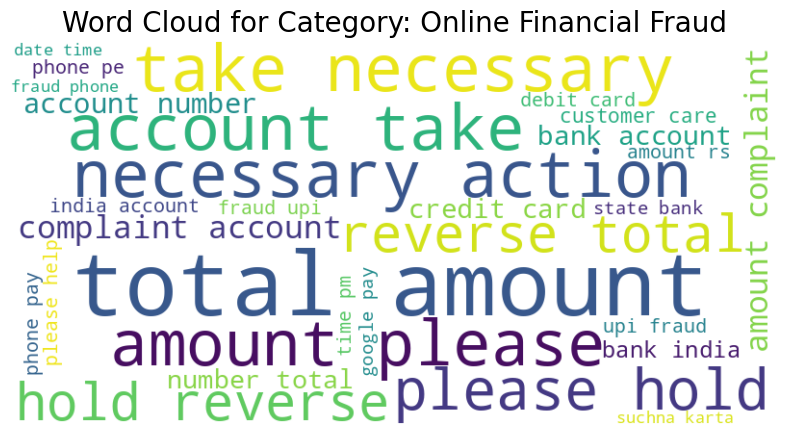

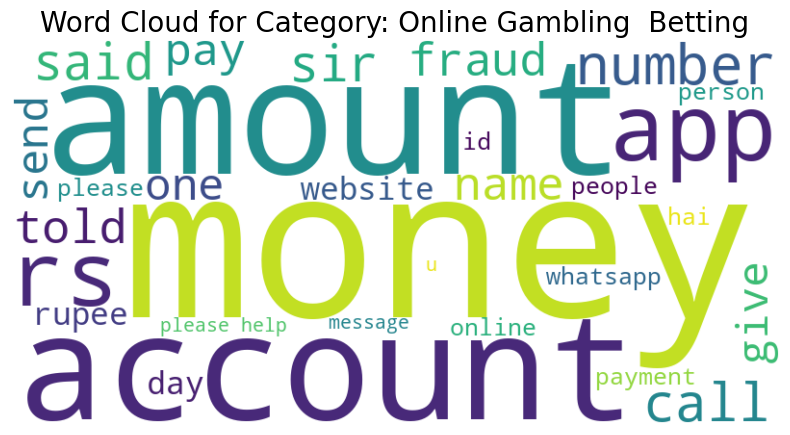

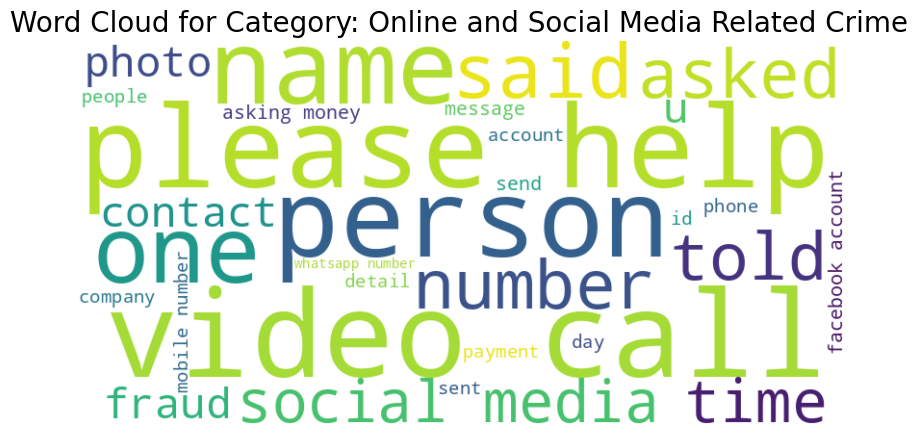

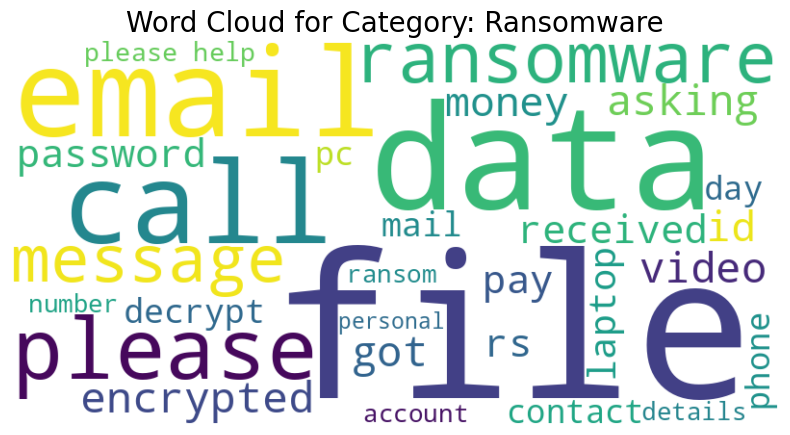

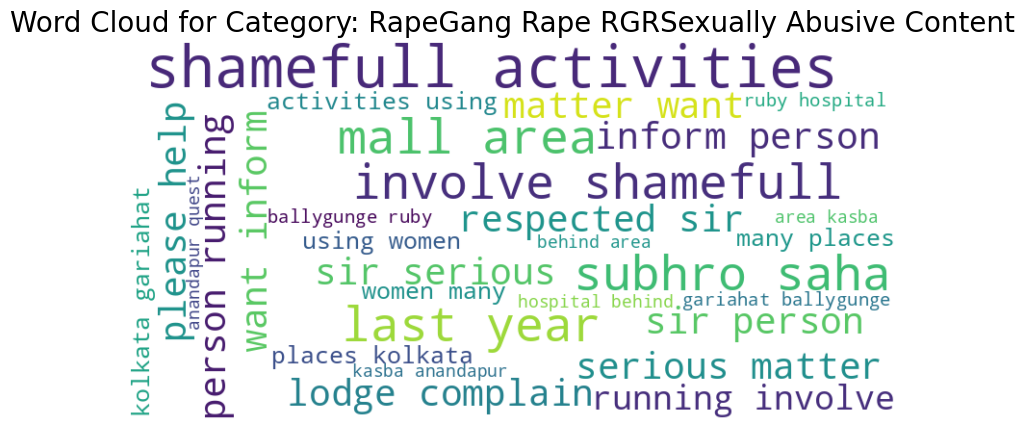

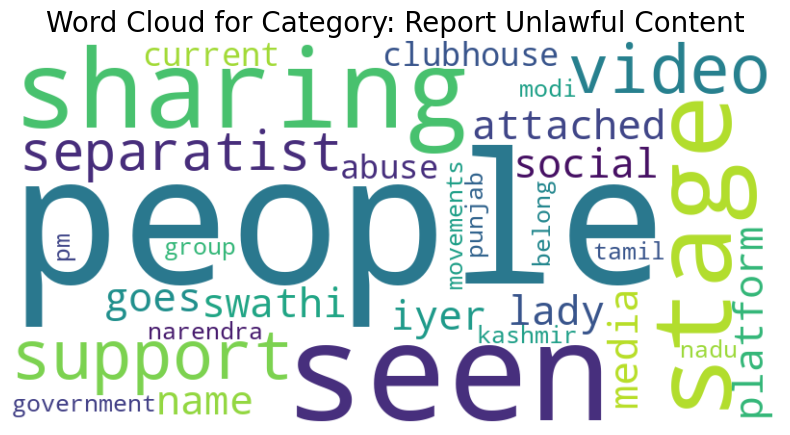

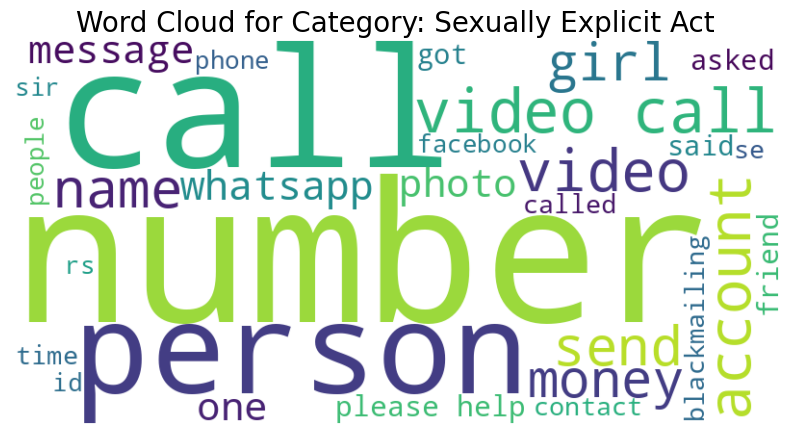

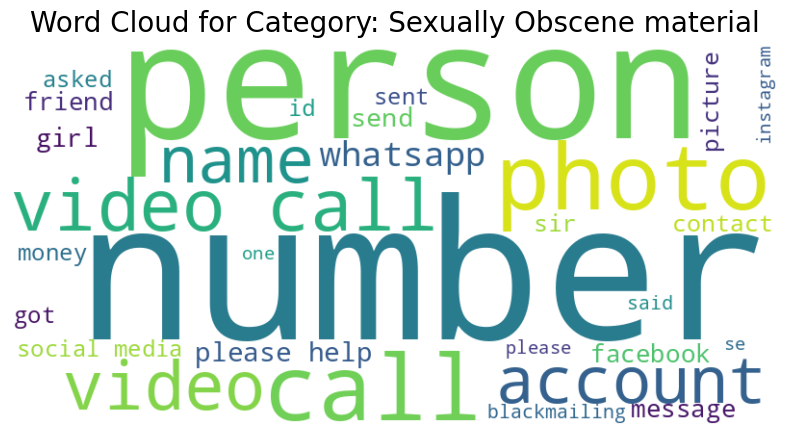

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation and numbers
        text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        text = ' '.join(word for word in text.split() if word not in stop_words)
    else:
        text = ''  # Replace non-string inputs with an empty string
    return text

# Clean the 'crimeaditionalinfo' column
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(clean_text)

# Group by category and concatenate text
grouped_text = df.groupby('category')['crimeaditionalinfo'].apply(lambda x: ' '.join(x)).reset_index()

# Create a WordCloud for each category
for index, row in grouped_text.iterrows():
    category = row['category']
    text = row['crimeaditionalinfo']

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=30, background_color='white').generate(text)

    # Plotting the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No axes for the word cloud
    plt.title(f'Word Cloud for Category: {category}', fontsize=20)
    plt.show()


In [ ]:
df.shape

(93686, 3)

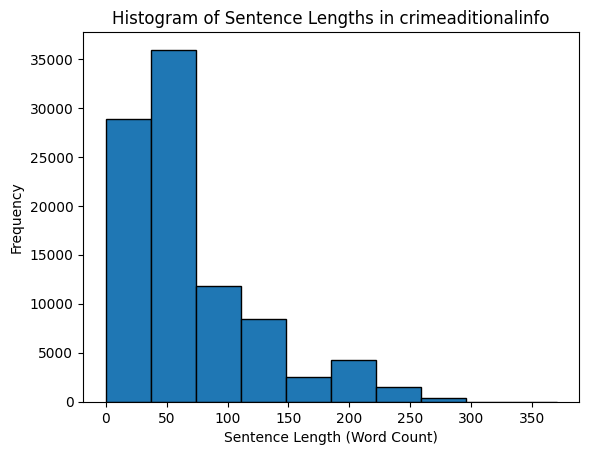

In [ ]:
import re
import matplotlib.pyplot as plt
def clean_text(text):
    # Check if the text is a string; if not, return an empty string
    if not isinstance(text, str):
        return ''
    # Remove punctuation and special characters, and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Split the text into words and filter out single-character words
    cleaned_words = [word for word in text.split() if len(word) > 1]
    # Join the cleaned words back into a string
    return ' '.join(cleaned_words)

# Apply the cleaning function
df['cleaned_text'] = df['crimeaditionalinfo'].apply(clean_text)

# Calculate sentence length as the number of words in each entry
df['sentence_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the histogram of sentence lengths
plt.hist(df['sentence_length'], bins=10, edgecolor='black')
plt.title('Histogram of Sentence Lengths in crimeaditionalinfo')
plt.xlabel('Sentence Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

Based on the histogram you provided, it appears that most of the text entries have a sentence length below 100 words, with a significant concentration around 50 words or fewer. To decide how much data to drop, you might consider:

Threshold Based on Outliers: Drop entries with sentence lengths above a certain threshold that are rare or extreme. For example, if entries above 150 or 200 words represent a small portion of the dataset and may not be typical, you could drop these.

Drop Based on Desired Focus: If you want to focus on typical sentence lengths, you might keep entries within a certain range (e.g., 10-100 words) and drop entries that fall outside this range.

In [ ]:
# Filter the DataFrame to keep rows with sentence length <= 150 words
df_filtered = df[df['sentence_length'] <= 150]

# Display the percentage of data retained
retained_percentage = len(df_filtered) / len(df) * 100
print(f"Percentage of data retained: {retained_percentage:.2f}%")


Percentage of data retained: 91.08%


In [ ]:
df=df_filtered.copy()

In [ ]:
df.shape

(85329, 5)

In [ ]:
df.head()

category                       sub_category  \
0  Online and Social Media Related Crime  Cyber Bullying  Stalking  Sexting   
1                 Online Financial Fraud                  Fraud CallVishing   
2               Online Gambling  Betting           Online Gambling  Betting   
3  Online and Social Media Related Crime                   Online Job Fraud   
4                 Online Financial Fraud                  Fraud CallVishing   

                                  crimeaditionalinfo  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                        cleaned_text  sentence_length  
0  had continue received random calls and abusive...               44  
1  the above fraudster is continuously messaging ...               44  
2  he is acting like police and demanding for mon...               38  
3  in apna job have applied for job interview for...               95  
4  received call from lady stating that she will ...               33

In [ ]:
df['category'].value_counts()

category
Online Financial Fraud                                  54581
Online and Social Media Related Crime                   11023
Any Other Cyber Crime                                    9657
Cyber Attack/ Dependent Crimes                           3608
Sexually Obscene material                                1712
Hacking  Damage to computercomputer system etc           1549
Sexually Explicit Act                                    1431
Cryptocurrency Crime                                      406
Online Gambling  Betting                                  405
Child Pornography CPChild Sexual Abuse Material CSAM      358
RapeGang Rape RGRSexually Abusive Content                 237
Online Cyber Trafficking                                  175
Cyber Terrorism                                           135
Ransomware                                                 51
Report Unlawful Content                                     1
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Assuming df is already loaded with your data and has columns 'category' and 'cleaned_text'

# Drop the "Report Unlawful Content" row
df = df[df["category"] != "Report Unlawful Content"]

# Select only 'cleaned_text' and 'category' columns
df = df[["category", "cleaned_text"]]

# Sample 50 rows per category
sampled_df = df.groupby("category").sample(n=50, random_state=1, replace=True).reset_index(drop=True)

# Display or save the resulting DataFrame
print(sampled_df)
# Optionally, save to CSV
sampled_df.to_csv("sampled_category_data.csv", index=False)


                      category  \
0        Any Other Cyber Crime   
1        Any Other Cyber Crime   
2        Any Other Cyber Crime   
3        Any Other Cyber Crime   
4        Any Other Cyber Crime   
..                         ...   
695  Sexually Obscene material   
696  Sexually Obscene material   
697  Sexually Obscene material   
698  Sexually Obscene material   
699  Sexually Obscene material   

                                          cleaned_text  
0    ish unknown number se mere pr call aya hai but...  
1    ramshwarum so madan lal kheda basti baniyani k...  
2    am rani mishra maine instagram pe shashwat tra...  
3    this person calls himself working in forest de...  
4    sending message to my contacts number with pho...  
..                                                 ...  
695  sir this guy name is manivannan calling in wha...  
696  have taken lon in small loon application actua...  
697  this mobile number has been call to my wife an...  
698  dear sir is what

In [ ]:
sampled_df.head()

category                                       cleaned_text
0  Any Other Cyber Crime  ish unknown number se mere pr call aya hai but...
1  Any Other Cyber Crime  ramshwarum so madan lal kheda basti baniyani k...
2  Any Other Cyber Crime  am rani mishra maine instagram pe shashwat tra...
3  Any Other Cyber Crime  this person calls himself working in forest de...
4  Any Other Cyber Crime  sending message to my contacts number with pho...

Classification Report:
                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.10      0.10      0.10        10
Child Pornography CPChild Sexual Abuse Material CSAM       0.23      0.30      0.26        10
                                Cryptocurrency Crime       1.00      0.70      0.82        10
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00        10
                                     Cyber Terrorism       0.36      0.40      0.38        10
      Hacking  Damage to computercomputer system etc       0.44      0.70      0.54        10
                            Online Cyber Trafficking       0.22      0.20      0.21        10
                              Online Financial Fraud       0.88      0.70      0.78        10
                            Online Gambling  Betting       0.55      0.60      0.57        10
               Online and Social Med

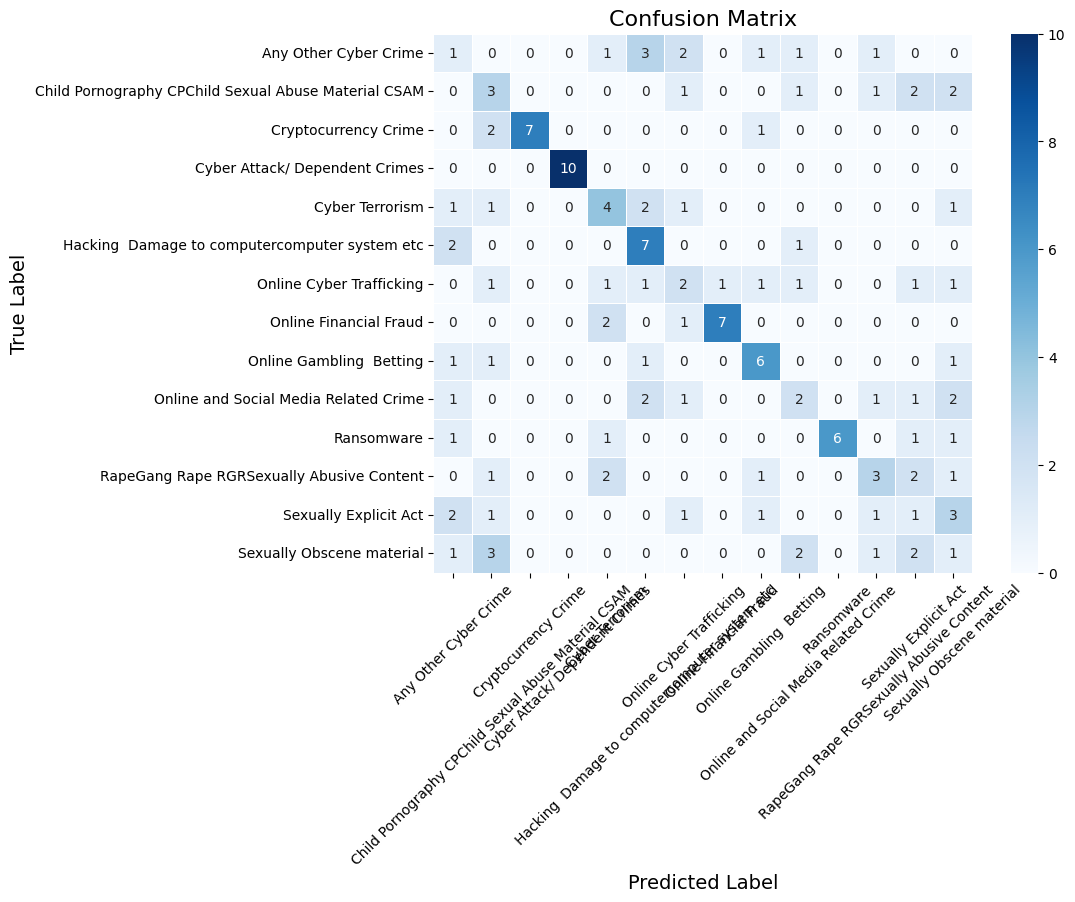

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Sampled DataFrame (replace this with your actual DataFrame)
df = sampled_df.copy()

# Map categories to numerical labels
category_mapping = {category: idx for idx, category in enumerate(df['category'].unique())}
df['category_numerical'] = df['category'].map(category_mapping)

# Split the dataset into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['category_numerical'], test_size=0.2, random_state=42, stratify=df['category_numerical'])

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and fit SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_tfidf)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=category_mapping.keys()))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=category_mapping.keys(), columns=category_mapping.keys())

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, linewidths=0.5)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Classification Report:
                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.14      0.10      0.12        10
Child Pornography CPChild Sexual Abuse Material CSAM       0.22      0.20      0.21        10
                                Cryptocurrency Crime       0.58      0.70      0.64        10
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00        10
                                     Cyber Terrorism       0.16      0.40      0.23        10
      Hacking  Damage to computercomputer system etc       0.36      0.50      0.42        10
                            Online Cyber Trafficking       0.27      0.30      0.29        10
                              Online Financial Fraud       0.67      0.60      0.63        10
                            Online Gambling  Betting       0.25      0.20      0.22        10
               Online and Social Med

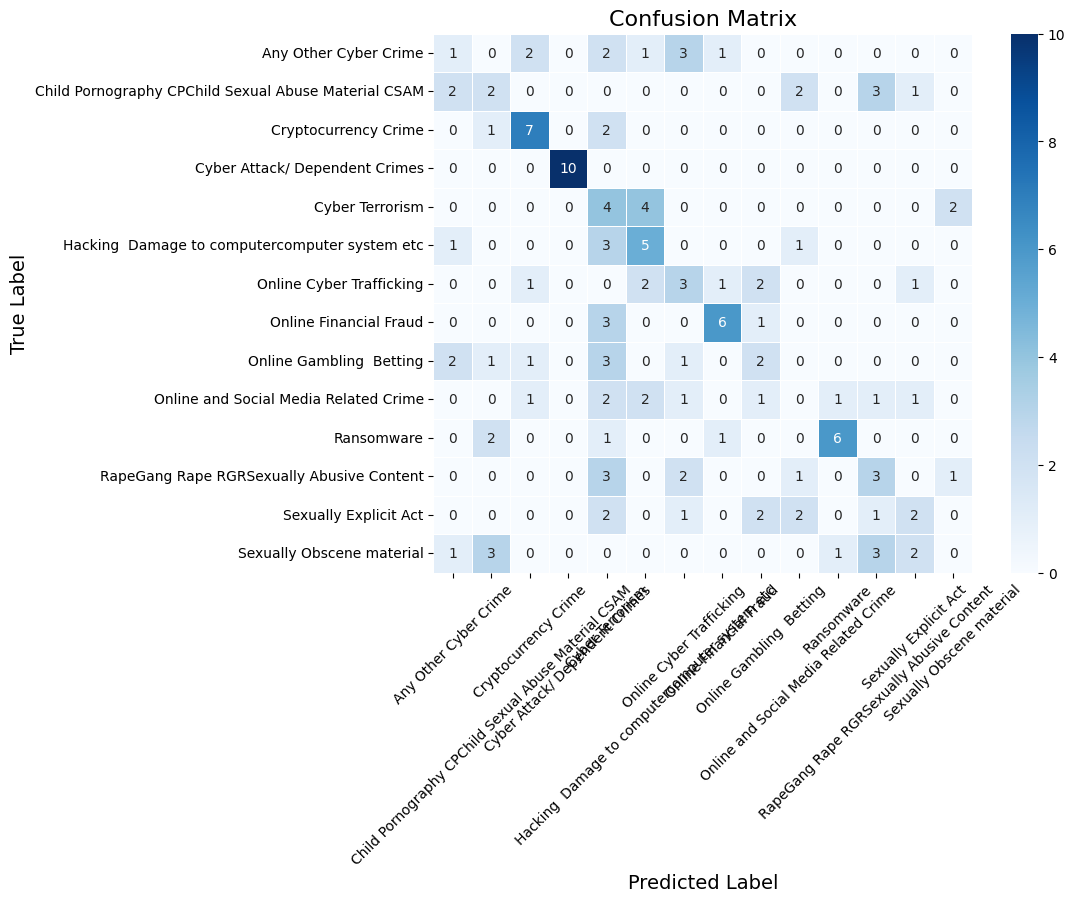

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sampled DataFrame (replace this with your actual DataFrame)
df = sampled_df.copy()

# Map categories to numerical labels
category_mapping = {category: idx for idx, category in enumerate(df['category'].unique())}
df['category_numerical'] = df['category'].map(category_mapping)

# Split the dataset into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['category_numerical'], test_size=0.2, random_state=42, stratify=df['category_numerical'])

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and fit Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=category_mapping.keys()))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=category_mapping.keys(), columns=category_mapping.keys())

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, linewidths=0.5)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 575ms/step - accuracy: 0.1065 - loss: 2.6371 - val_accuracy: 0.1161 - val_loss: 2.6240
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.1620 - loss: 2.5450 - val_accuracy: 0.1071 - val_loss: 2.5050
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 369ms/step - accuracy: 0.2187 - loss: 2.3625 - val_accuracy: 0.1250 - val_loss: 2.4964
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.2366 - loss: 2.3492 - val_accuracy: 0.1339 - val_loss: 2.4789
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step - accuracy: 0.2745 - loss: 2.2645 - val_accuracy: 0.1786 - val_loss: 2.4062
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.2997 - loss: 2.0878 - val_accuracy: 0.1696 - val_loss: 2.3690
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.3437 - loss: 1.9235 - val_accuracy: 0.2500 - val_loss: 2.3410
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.4519 - loss: 1.6519 - val_accuracy: 0

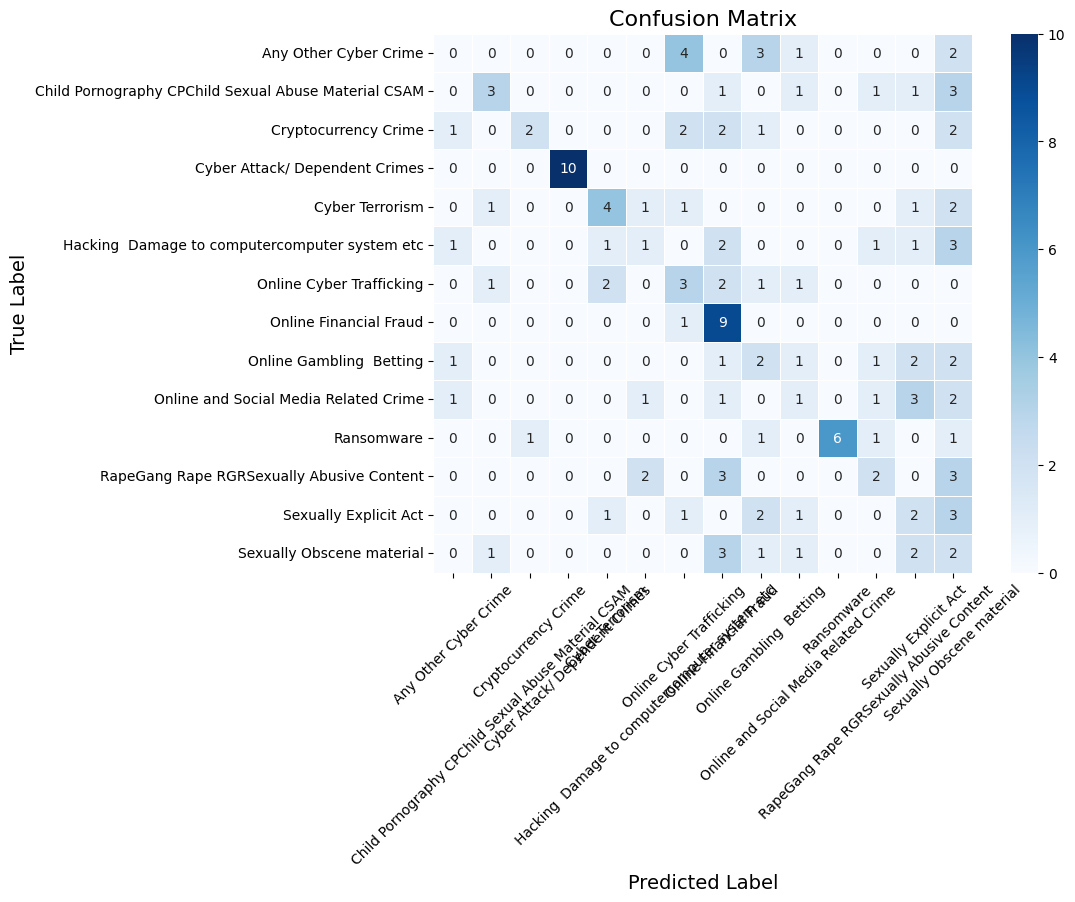

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Sampled DataFrame (replace this with your actual DataFrame)
df = sampled_df.copy()

# Map categories to numerical labels
category_mapping = {category: idx for idx, category in enumerate(df['category'].unique())}
df['category_numerical'] = df['category'].map(category_mapping)

# Split the dataset into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'],
    df['category_numerical'],
    test_size=0.2,
    random_state=42,
    stratify=df['category_numerical']
)

# Tokenization and padding
max_words = 10000  # Maximum number of words to keep, based on word frequency
max_sequence_length = 100  # Maximum length of sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Create LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(len(category_mapping), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Make predictions
y_pred_prob = model.predict(X_test_pad)
y_pred = y_pred_prob.argmax(axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=category_mapping.keys()))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=category_mapping.keys(), columns=category_mapping.keys())

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, linewidths=0.5)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Classification Report:
                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.00      0.00      0.00        10
Child Pornography CPChild Sexual Abuse Material CSAM       0.00      0.00      0.00        10
                                Cryptocurrency Crime       0.00      0.00      0.00        10
                      Cyber Attack/ Dependent Crimes       0.83      1.00      0.91        10
                                     Cyber Terrorism       0.00      0.00      0.00        10
      Hacking  Damage to computercomputer system etc       0.13      0.50      0.20        10
                            Online Cyber Trafficking       0.33      0.10      0.15        10
                              Online Financial Fraud       0.00      0.00      0.00        10
                            Online Gambling  Betting       0.13      0.20      0.16        10
               Online and Social Med

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


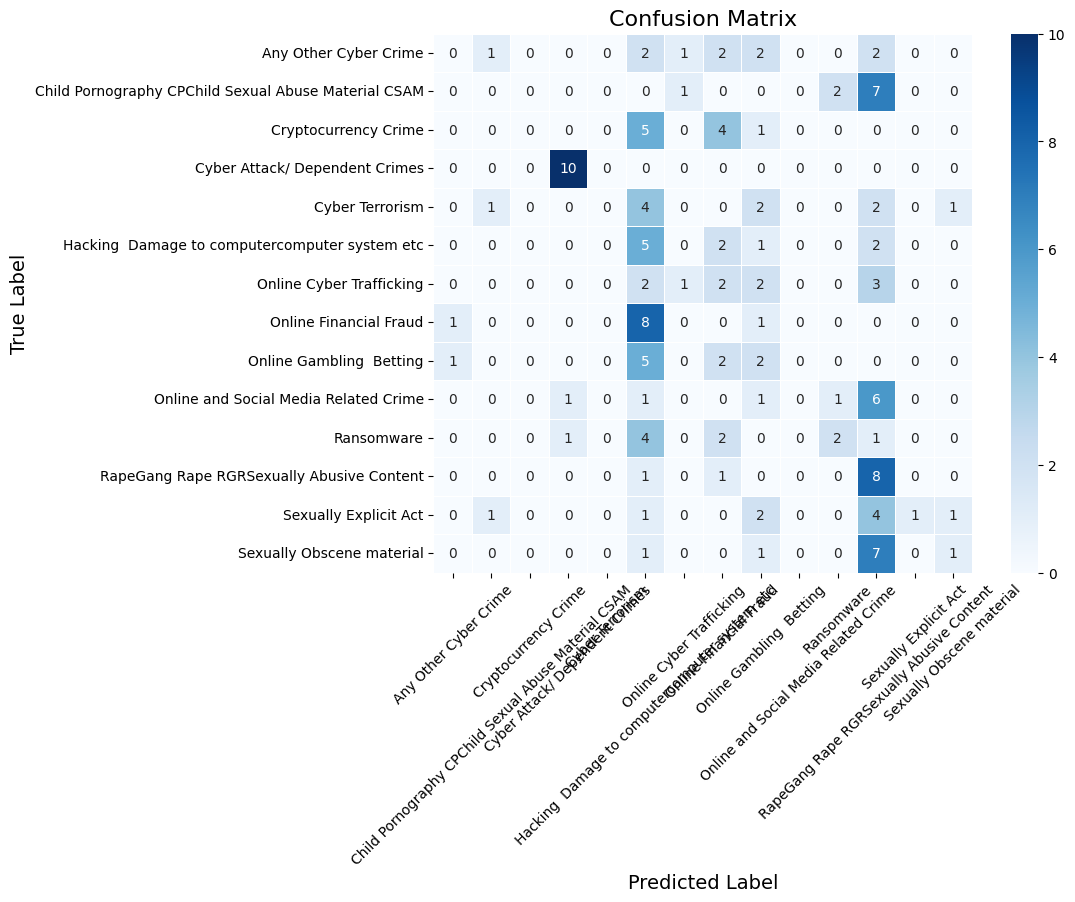

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch

# Sampled DataFrame (replace this with your actual DataFrame)
df = sampled_df.copy()

# Map categories to numerical labels
category_mapping = {category: idx for idx, category in enumerate(df['category'].unique())}
df['category_numerical'] = df['category'].map(category_mapping)

# Split the dataset into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'],
    df['category_numerical'],
    test_size=0.2,
    random_state=42,
    stratify=df['category_numerical']
)

# Load the tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

# Tokenize the data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Create a custom dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = CustomDataset(train_encodings, y_train.to_numpy())
test_dataset = CustomDataset(test_encodings, y_test.to_numpy())

# Load the model
model = XLMRobertaForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=len(category_mapping))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',           # output directory
    num_train_epochs=3,               # total number of training epochs
    per_device_train_batch_size=16,   # batch size per device during training
    per_device_eval_batch_size=16,    # batch size for evaluation
    warmup_steps=500,                  # number of warmup steps for learning rate scheduler
    weight_decay=0.01,                 # strength of weight decay
    logging_dir='./logs',              # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",
)

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Make predictions
y_pred_prob = trainer.predict(test_dataset)
y_pred = torch.argmax(torch.tensor(y_pred_prob.predictions), dim=1).numpy()

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=category_mapping.keys()))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=category_mapping.keys(), columns=category_mapping.keys())

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, linewidths=0.5)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [ ]:
!pip install huggingface_hub


In [ ]:
# Save the model and tokenizer
model.save_pretrained('tiya1012/cybersecurity_complaint_xlmroberta')
tokenizer.save_pretrained('tiya1012/cybersecurity_complaint_xlmroberta')


In [ ]:
sampled_df['category'].value_counts()

category
Any Other Cyber Crime                                   50
Child Pornography CPChild Sexual Abuse Material CSAM    50
Cryptocurrency Crime                                    50
Cyber Attack/ Dependent Crimes                          50
Cyber Terrorism                                         50
Hacking  Damage to computercomputer system etc          50
Online Cyber Trafficking                                50
Online Financial Fraud                                  50
Online Gambling  Betting                                50
Online and Social Media Related Crime                   50
Ransomware                                              50
RapeGang Rape RGRSexually Abusive Content               50
Sexually Explicit Act                                   50
Sexually Obscene material                               50
Name: count, dtype: int64

In [ ]:
df['sub_category'].value_counts()

sub_category
UPI Related Frauds                                                      25763
DebitCredit Card FraudSim Swap Fraud                                    10327
Other                                                                    9657
Internet Banking Related Fraud                                           8513
Fraud CallVishing                                                        5217
EWallet Related Fraud                                                    3814
Cyber Bullying  Stalking  Sexting                                        3684
FakeImpersonating Profile                                                2149
Profile Hacking Identity Theft                                           1948
Cheating by Impersonation                                                1811
Unauthorised AccessData Breach                                            993
Online Job Fraud                                                          737
DematDepository Fraud                                                     682
Tampering with computer source documents                                  562
Hacking/Defacement                                                        540
Ransomware Attack                                                         534
Malware Attack                                                            521
SQL Injection                                                             508
Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks      504
Data Breach/Theft                                                         484
Cryptocurrency Fraud                                                      406
Online Gambling  Betting                                                  405
Provocative Speech for unlawful acts                                      390
Email Hacking                                                             329
Business Email CompromiseEmail Takeover                                   265
Online Trafficking                                                        175
EMail Phishing                                                            136
Cyber Terrorism                                                           135
Online Matrimonial Fraud                                                  105
Damage to computer computer systems etc                                    97
Website DefacementHacking                                                  85
Ransomware                                                                 51
Impersonating Email                                                        39
Intimidating Email                                                         24
Against Interest of sovereignty or integrity of India                       1
Name: count, dtype: int64